In [1]:
import time
import nltk
from nltk.corpus import stopwords
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By

In [2]:
driv = webdriver.Chrome(executable_path = r'C:\Users\GALAXY ROY\.wdm\drivers\chromedriver\win32\93.0.4577.15\chromedriver')  # We Initiate a Web Driver Session

#### Logging In into Instagram

In [4]:
driv.get('https://www.instagram.com/')                                     # Opening instagram.com
time.sleep(2)                                                              # Waiting for 2 secs for the webpage to load properly
driv.find_element_by_name('username').send_keys('zexalzayne9000@gmail.com')         # We input the email id or username into the first search bar
driv.find_element_by_name('password').send_keys('Dreadnought9999')         # We input the password into the second search bar
driv.find_element_by_xpath('//button[@type = "submit"]').click()           # Now We click on Log In button
time.sleep(4)                                                             # After logging in we wait for 4 secs for instagram to load properly 
driv.find_elements_by_xpath('//button[@type = "button"]')[1].click()       # Dismiss the save information window
driv.find_element_by_xpath('//button[@class = "aOOlW   HoLwm "]').click()  # Dismiss the notification Turn On window

### Q 1) Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

#### 1.1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [33]:
l = []
for i in range(10):
    driv.find_element_by_xpath('//input[@placeholder = "Search"]').send_keys('food')
    time.sleep(3)
    driv.find_elements_by_xpath('//a[@class = "-qQT3"]')[i].click()
    time.sleep(3)
    handl = driv.find_element_by_tag_name('h2').text
    foll = driv.find_elements_by_xpath('//span[@class = "g47SY "]')[1].get_attribute('title')
    foll = int(foll.replace(',',''))
    l.append((foll,handl))
    driv.back()
    time.sleep(3)
    
l.sort(reverse = True)
l = l[:5]
top5_hndl = [i[1] for i in l]

print("Top 5 Handles with highest followers are :-\n")
for i,j in l:
    print(f"{j} ----> {i} Followers")

Top 5 Handles with highest followers are :-

yourfoodlab ----> 1793292 Followers
foodie_incarnate ----> 725328 Followers
foodtalkindia ----> 305943 Followers
delhifoodwalks ----> 152393 Followers
food ----> 139406 Followers


#### 1.2) Find the number of posts these handles have done in the previous 3 days.

In [7]:
cnt = 0
posts_last_3 = []

for i in range(5):
    m = -1
    j = 0
    while j >= 0:
        
        driv.find_element_by_xpath('//input[@placeholder = "Search"]').send_keys('food')
        time.sleep(1)
        txt = driv.find_elements_by_xpath('//div[@class = "fuqBx "]//div[contains(@class,"qyrsm")]')[j].text
        link = driv.find_elements_by_xpath('//a[@class = "-qQT3"]')[j]
        
        if txt == top5_hndl[i]:
            m = 0
            link.click()
            time.sleep(3)
            driv.find_element_by_xpath('//div[@class = "_9AhH0"]').click()
            time.sleep(2)
            
            while True:
                wqt = driv.find_element_by_xpath('//a[@class = "c-Yi7"]/time').get_attribute('title')
                time.sleep(1)
                day = int(wqt[4:wqt.index(',')])
                mnth = wqt[:3]
                
                if mnth == 'Sep' and (day == 14 or day == 13 or day == 12 or day == 15):
                    if day == 15:
                        driv.find_element_by_xpath('//a[@class = " _65Bje  coreSpriteRightPaginationArrow"]').click()
                        time.sleep(4)
                        continue
                        
                    else:
                        cnt += 1
                    
                else:
                    driv.find_element_by_xpath('//div[contains(@class,"fm1AK")]').click()
                    driv.back()
                    time.sleep(3)
                    break
                    
                driv.find_element_by_xpath('//a[@class = " _65Bje  coreSpriteRightPaginationArrow"]').click()
                time.sleep(4)
                
        if m == 0:
            posts_last_3.append(cnt)
            break
            
        driv.find_element_by_xpath('//div[contains(@class,"coreSpriteSearchClear")]').click()
        j += 1
        
    cnt = 0
    
driv.get('https://www.instagram.com/')
print("No of posts in the previous 3 days Of the Top 5 Handles are :- \n")
for i in range(5):
    print(f"{top5_hndl[i]} with {posts_last_3[i]} posts")

No of posts in the previous 3 days Of the Top 5 Handles are :- 

yourfoodlab with 3 posts
foodie_incarnate with 4 posts
foodtalkindia with 2 posts
delhifoodwalks with 2 posts
food with 1 posts


#### 1.3) Depict the above information using a suitable graph.

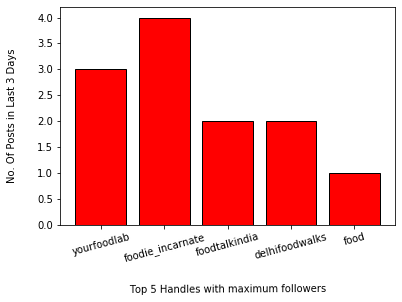

In [48]:
top5 = pd.Series(top5_hndl)
posts_last_3 = pd.Series(posts_last_3)
plt.bar(top5, np.array(posts_last_3), color = 'red', edgecolor = 'black')
plt.xlabel('Top 5 Handles with maximum followers',labelpad = 20.0,rotation = 0.3)
plt.ylabel('No. Of Posts in Last 3 Days',labelpad = 20.0)
plt.xticks(rotation = 15)
plt.show()

### Q 2) Your friend also needs a list of hashtags that he should use in his posts.

#### 2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [21]:
d = {}
stop_words = stopwords.words("english")
def content_processing(x):
    x = x.lower()
    x = ' '.join([word for word in x.split() if word not in stop_words])
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'@\S+', ' ', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    return x

for i in range(5):
    m = -1
    j = 0
    while j >= 0:
        
        driv.find_element_by_xpath('//input[@placeholder = "Search"]').send_keys('food')
        time.sleep(1)
        txt = driv.find_elements_by_xpath('//div[@class = "fuqBx "]//div[contains(@class,"qyrsm")]')[j].text
        link = driv.find_elements_by_xpath('//a[@class = "-qQT3"]')[j]
        
        if txt == top5_hndl[i]:
            m = 0
            k = 0
            link.click()
            time.sleep(3)
            driv.find_element_by_xpath('//div[@class = "_9AhH0"]').click()
            time.sleep(3)
            
            while k < 10:
                txt = driv.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span').text
                txt = content_processing(txt)
                
                for i in txt.strip().split():
                    if i in d:
                        d[i] += 1
                    else:
                        d[i] = 1
                
                driv.find_element_by_xpath('//a[@class = " _65Bje  coreSpriteRightPaginationArrow"]').click()
                time.sleep(4)
                k += 1
                
            driv.find_element_by_xpath('//div[contains(@class,"fm1AK")]').click()
            driv.back()
            time.sleep(3)
                
        if m == 0:
            break
            
        driv.find_element_by_xpath('//div[contains(@class,"coreSpriteSearchClear")]').click()
        j += 1
        
driv.get('https://instagram.com/')

#### 2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [22]:
print("Words Obtained from all the Scraped Posts along with their Frequencies are :-\n")
for i,j in d.items():
    print(f"{i} ---> {j}")

Words Obtained from all the Scraped Posts along with their Frequencies are :-

coming ---> 1
tomorrow ---> 4
finally ---> 3
amritsari ---> 1
nutri ---> 1
kulcha ---> 1
recipe ---> 26
ready ---> 1
uploaded ---> 1
inbox ---> 1
full ---> 12
dms ---> 1
shot ---> 1
going ---> 1
love ---> 11
comes ---> 1
pm ---> 5
ist ---> 3
youtube ---> 19
channel ---> 18
see ---> 3
there ---> 2
pav ---> 7
bhaji ---> 7
chef ---> 3
started ---> 2
humble ---> 2
cooking ---> 8
journey ---> 2
first ---> 4
turned ---> 2
amazing ---> 3
beautiful ---> 4
community ---> 4
millions ---> 2
people ---> 3
art ---> 3
food ---> 9
yfl ---> 6
wouldnt ---> 4
existed ---> 2
loved ---> 4
much ---> 2
since ---> 3
kid ---> 2
one ---> 11
really ---> 3
close ---> 2
heart ---> 2
thank ---> 5
everyone ---> 3
part ---> 2
making ---> 4
possible ---> 2
yours ---> 3
lets ---> 3
make ---> 4
watched ---> 2
videos ---> 2
sending ---> 2
lots ---> 2
cheers ---> 4
new ---> 9
video ---> 19
high ---> 2
protein ---> 2
multigrain ---> 1
dosa --->

#### 2.3) Create a CSV file with two columns : the word and its frequency

In [59]:
df = pd.DataFrame(d.items(), columns = ['Word','Frequency'])
df.sort_values('Frequency',ascending = False, inplace = True)
df.reset_index(drop = True, inplace = True)
df.to_csv('Words_frequency.csv', index = False)
df

,Word,Frequency
0,recipe,26
1,video,19
2,youtube,19
3,channel,18
4,us,12
...,...,...
638,acidity,1
639,bright,1
640,tones,1
641,berry,1


#### 2.4) Find the hashtags that were most popular among these bloggers

In [60]:
hshtgs = []

for i in range(5):
    m = -1
    j = 0
    
    while j >= 0:
        
        driv.find_element_by_xpath('//input[@placeholder = "Search"]').send_keys('food')
        time.sleep(2)
        txt = driv.find_elements_by_xpath('//div[@class = "fuqBx "]//div[contains(@class,"qyrsm")]')[j].text
        link = driv.find_elements_by_xpath('//a[@class = "-qQT3"]')[j]
        
        if txt == top5_hndl[i]:
            m = 0
            k = 0
            link.click()
            time.sleep(3)
            driv.find_element_by_xpath('//div[@class = "_9AhH0"]').click()
            time.sleep(3)
            
            while k < 10:
                
                try:
                    for i in driv.find_elements_by_xpath('//a[contains(@class,"xil3i")]'):
                        hshtgs.append(i.text)
                        
                except NoSuchElementException:
                    pass
                    
                driv.find_element_by_xpath('//a[@class = " _65Bje  coreSpriteRightPaginationArrow"]').click()
                time.sleep(3)
                k += 1
                
            driv.find_element_by_xpath('//div[contains(@class,"fm1AK")]').click()
            driv.back()
            time.sleep(3)
                
        if m == 0:
            break
            
        driv.find_element_by_xpath('//div[contains(@class,"coreSpriteSearchClear")]').click()
        j += 1
        
driv.get('https://instagram.com/') 
hshtgs = pd.Series(hshtgs)
val_cnt = hshtgs.value_counts()
tgs = val_cnt.index[1:]
cnt = val_cnt.values[1:]

print("The Most popular Hashtags among the Bloggers, along with their Frequencies of use are :-\n")
for i in range(len(tgs)):
    print(f'"{tgs[i]}" -----> {cnt[i]} Times')

The Most popular Hashtags among the Bloggers, along with their Frequencies of use are :-

"#foodporn" -----> 19 Times
"#foodtalkindia" -----> 14 Times
"#instafood" -----> 14 Times
"#streetfood" -----> 12 Times
"#foodie" -----> 10 Times
"#foodtalk" -----> 9 Times
"#streetfoodindia" -----> 9 Times
"#indianfood" -----> 8 Times
"#foodieincarnate" -----> 8 Times
"#foodies" -----> 7 Times
"#foodiesofinstagram" -----> 7 Times
"#foodandwine" -----> 7 Times
"#foodwalkswithanubhav" -----> 6 Times
"#delhifood" -----> 6 Times
"#delhifoodblogger" -----> 6 Times
"#nycfoodie" -----> 6 Times
"#eatmunchies" -----> 6 Times
"#infatuationnyc" -----> 6 Times
"#beautifulcuisines" -----> 6 Times
"#nyceats" -----> 6 Times
"#nycfood" -----> 6 Times
"#nyc" -----> 6 Times
"#infatuation" -----> 6 Times
"#sodelhi" -----> 6 Times
"#eater" -----> 6 Times
"#feedfeed" -----> 6 Times
"#lovefood" -----> 6 Times
"#foodbeast" -----> 6 Times
"#newdelhi" -----> 6 Times
"#EEEEEATS" -----> 6 Times
"#bonappetite" -----> 6 Time

#### 2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

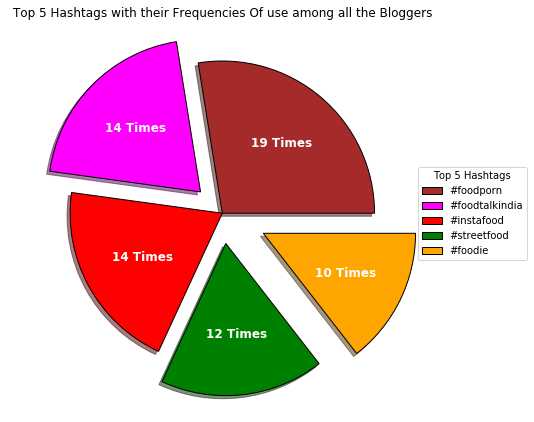

In [64]:
def fn(x):
    def f(pct):
        tot = sum(x)
        val = int(round(pct * tot / 100.0))
        return str(val) + ' Times'
    return f

explode = (0.0, 0.2, 0.0, 0.2, 0.3)
colors = ('brown','magenta','red','green','orange')
wp = {'linewidth' : 1, 'edgecolor' : "black"}
fig, ax = plt.subplots(figsize =(10,7))
wd, texts, txt = ax.pie(cnt[:5], autopct = fn(cnt[:5]), explode = explode, labels = tgs[:5], shadow = True, colors = colors, wedgeprops = wp, textprops = dict(color = "white"))
ax.legend(wd, tgs[:5], title = "Top 5 Hashtags", loc = "center left", bbox_to_anchor = (1,0,0.5,1))
plt.setp(txt, size = 12, weight ="bold")
ax.set_title("Top 5 Hashtags with their Frequencies Of use among all the Bloggers")
plt.show()

### Q 3) You need to also calculate average followers : likes ratio for the obtained handles.

#### 3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [35]:
no_of_likes = []
sum_of_likes = []
no_of_followers = [i[0] for i in l]

print("Instagram Handle        No. Of Likes in the Top 10 Posts\n")
for i in range(5):
    m = -1
    j = 0
    no_of_likes.clear()
    
    while j >= 0:
        
        driv.find_element_by_xpath('//input[@placeholder = "Search"]').send_keys('food')
        time.sleep(2)
        txt = driv.find_elements_by_xpath('//div[@class = "fuqBx "]//div[contains(@class,"qyrsm")]')[j].text
        link = driv.find_elements_by_xpath('//a[@class = "-qQT3"]')[j]
        
        if txt == top5_hndl[i]:
            m = 0
            k = 0
            link.click()
            time.sleep(3)
            driv.find_element_by_xpath('//div[@class = "_9AhH0"]').click()
            time.sleep(3)
            
            while k < 10:
                
                try:
                    lks = driv.find_element_by_xpath('//a[@class = "zV_Nj"]//span').text
                    if lks == '':
                        lks = rn.randint(240,900)
                    else:
                        lks = int(lks.replace(',','')) if ',' in lks else int(lks)
                    
                except NoSuchElementException:
                    driv.find_element_by_xpath('//span[@class = "vcOH2"]').click()
                    lks = driv.find_element_by_xpath('//div[@class = "vJRqr"]//span').text
                    lks = int(lks.replace(',','')) if ',' in lks else int(lks)
                    driv.find_element_by_xpath('//div[@class = "QhbhU"]').click()
                
                no_of_likes.append(lks)
                driv.find_element_by_xpath('//a[@class = " _65Bje  coreSpriteRightPaginationArrow"]').click()
                time.sleep(4)
                k += 1
            
            driv.find_element_by_xpath('//div[contains(@class,"fm1AK")]').click()
            time.sleep(5)
            driv.back()
            time.sleep(3)
                
        if m == 0:
            sum_of_likes.append(sum(no_of_likes))
            print(top5_hndl[i],end = '       ')
            for i in range(len(no_of_likes) - 1):
                print(no_of_likes[i],end = ', ')
            print(no_of_likes[-1])
            break
            
        driv.find_element_by_xpath('//div[contains(@class,"coreSpriteSearchClear")]').click()
        j += 1
        
driv.get('https://instagram.com/')

Instagram Handle        No. Of Likes in the Top 10 Posts

yourfoodlab       21742, 46321, 64497, 11291, 18852, 16393, 26667, 85545, 58143, 105306
foodie_incarnate       17596, 34362, 49227, 22553, 27817, 47725, 40084, 36798, 61236, 31170
foodtalkindia       568, 5808, 665, 223, 788, 2820, 635, 267, 145, 301
delhifoodwalks       877, 1325, 192, 275, 527, 572, 255, 447, 474, 681
food       363, 870, 934, 1372, 1525, 1094, 1468, 1376, 12128, 2369


#### 3.2) Calculate the average likes for a handle.

In [37]:
avg_likes = np.floor_divide(np.array(sum_of_likes),10)
print("Average Likes for the Top 5 Handles are :-\n")
for i in range(5):
    print(f"{top5_hndl[i]} ----> {avg_likes[i]} Likes")

Average Likes for the Top 5 Handles are :-

yourfoodlab ----> 45475 Likes
foodie_incarnate ----> 36856 Likes
foodtalkindia ----> 1222 Likes
delhifoodwalks ----> 562 Likes
food ----> 2349 Likes


#### 3.3) Divide the average likes obtained from the number of followers of the handle to get the average (followers : like) ratio of each handle.

In [40]:
no_of_foll = np.array(no_of_followers)
avg_foll_like_ratio = np.array([round(i,2) for i in np.true_divide(no_of_foll,avg_likes)])
print("Average Followers : Like ratio for the Top 5 handles are :-\n")
for i in range(5):
    print(f"{top5_hndl[i]} ----> {avg_foll_like_ratio[i]}")

Average Followers : Like ratio for the Top 5 handles are :-

yourfoodlab ----> 39.43
foodie_incarnate ----> 19.68
foodtalkindia ----> 250.36
delhifoodwalks ----> 271.16
food ----> 59.35


#### 3.4) Create a bar graph to depict the above obtained information.

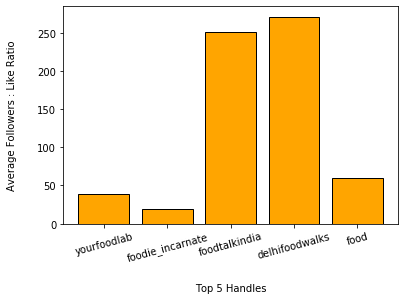

In [47]:
plt.bar(top5_hndl, avg_foll_like_ratio, color = 'orange', edgecolor = 'black')
plt.ylabel('Average Followers : Like Ratio',labelpad = 20.0)
plt.xlabel('Top 5 Handles',labelpad = 20.0)
plt.xticks(rotation = 15)
plt.show()